---

<center>

# **"Sharkmageddon"**
### **Nasa Space Apps Challenge**

</center>

---

#### **Members:**
- Isaac Yael Cantú Fernández
- Noé Garza Santos
- Bernardo Servin Daniel
- Benjamin Charlesl Legorreta
- Juan Ángel Candelaria Rodríguez

### **Libraries**

In [ ]:
!pip install planetary_computer
!pip install pystac_client
!pip install odc-stac
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.9 MB/s eta 0:00:00


In [ ]:
import os
import requests
import pandas as pd
import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta
import planetary_computer
import pystac_client

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

### **Sharks databases**

- OCEARCH

In [ ]:
sharks = pd.read_csv('Sharks.csv')
sharks.describe()

,id,category,rating,voting,custom_marker,longitude,latitude
count,4.510000e+02,451.000000,0.0,0.0,0.0,451.000000,451.000000
mean,5.646118e+05,8593.243902,NaN,NaN,NaN,-20.909149,12.350369
std,5.875050e+05,1040.322896,NaN,NaN,NaN,93.590588,27.191185
min,2.882110e+05,8494.000000,NaN,NaN,NaN,-178.357470,-36.010750
25%,2.883315e+05,8494.000000,NaN,NaN,NaN,-82.080090,-18.972490
50%,2.884540e+05,8494.000000,NaN,NaN,NaN,-73.586040,26.005690
75%,5.520175e+05,8494.000000,NaN,NaN,NaN,23.200725,34.611380
max,2.881663e+06,19578.000000,NaN,NaN,NaN,179.444960,50.846000


> **Limpieza de variables**

In [ ]:
sharks = sharks.drop(['name','slug','category','is_published','flags','rating','voting','category_name','image','image_data','zping','tag_location','zping_datetime','custom_marker'],axis=1)
sharks["last_move_datetime"] = pd.to_datetime(sharks["last_move_datetime"], errors="coerce")
sharks = sharks[sharks['species'].str.contains('Shark', case=False, na=False)]
sharks.describe()

,id,longitude,latitude
count,3.780000e+02,378.000000,378.000000
mean,5.220567e+05,-10.312884,9.464740
std,5.145281e+05,97.468015,28.405643
min,2.882110e+05,-178.357470,-36.010750
25%,2.883285e+05,-79.868570,-20.197502
50%,2.884505e+05,-70.482260,24.638120
75%,5.500028e+05,48.271232,34.399775
max,2.881663e+06,179.444960,50.846000


> **DataFrame**

In [ ]:
sharks.head(20)

,id,last_update,length,weight,last_move_datetime,stage_of_life,species,gender,longitude,latitude
0,288211,2025-08-29T20:33:29.142129Z,12 ft 5 in.,"1,142 lbs",2018-12-30 10:28:52+00:00,Sub-Adult,White Shark (Carcharodon carcharias),Female,-79.78037,32.209960
1,288212,2025-08-29T20:40:20.395973Z,9 ft 2 in.,250 lb,2014-06-01 11:51:10+00:00,Sub-Adult,Tiger Shark (Galeocerdo cuvier),Male,-80.83400,31.934852
2,288213,2025-08-29T20:32:14.512120Z,5 ft 5 in.,88 lbs,2017-10-11 20:25:02+00:00,Young of the Year,White Shark (Carcharodon carcharias),Male,-72.58917,40.790990
3,288214,2025-08-29T20:34:28.516475Z,6 ft 3 in.,186 lb,2014-03-14 00:58:27+00:00,Juvenile,Blacktip Shark (Carcharhinus limbatus),Female,-90.29596,-0.489680
4,288215,2025-08-29T20:32:01.304365Z,8 ft 11 in.,321 lb,2014-08-17 11:30:42+00:00,Sub-Adult,Tiger Shark (Galeocerdo cuvier),Female,-32.36485,-3.787600
5,288216,2025-08-29T21:00:20.890889Z,9 ft 9 in.,775 lb,2012-06-12 06:21:58+00:00,Sub-Adult,White Shark (Carcharodon carcharias),Female,19.27820,-34.549870
6,288217,2025-08-29T20:40:47.839143Z,6 ft 4 in.,135 lb,2020-04-11 01:51:37+00:00,Sub-Adult,Shortfin Mako Shark (Isurus oxyrinchus),Male,-96.55284,25.827470
7,288218,2025-08-29T20:38:54.094076Z,4 ft 5 in.,100 lb,2017-09-11 08:52:56+00:00,Juvenile,Tiger Shark (Galeocerdo cuvier),Female,-93.09572,29.275290
8,288219,2025-08-29T20:31:11.287935Z,9 ft,200 lb,2014-05-03 11:46:16+00:00,Sub-Adult,Blue Shark (Prionace glauca),Male,-83.08239,10.005920
9,288220,2025-08-29T20:38:25.145676Z,8 ft 3 in.,NaN,2014-08-29 11:47:34+00:00,Sub-Adult,Tiger Shark (Galeocerdo cuvier),Female,-80.81086,2.105030


> **Visualización**

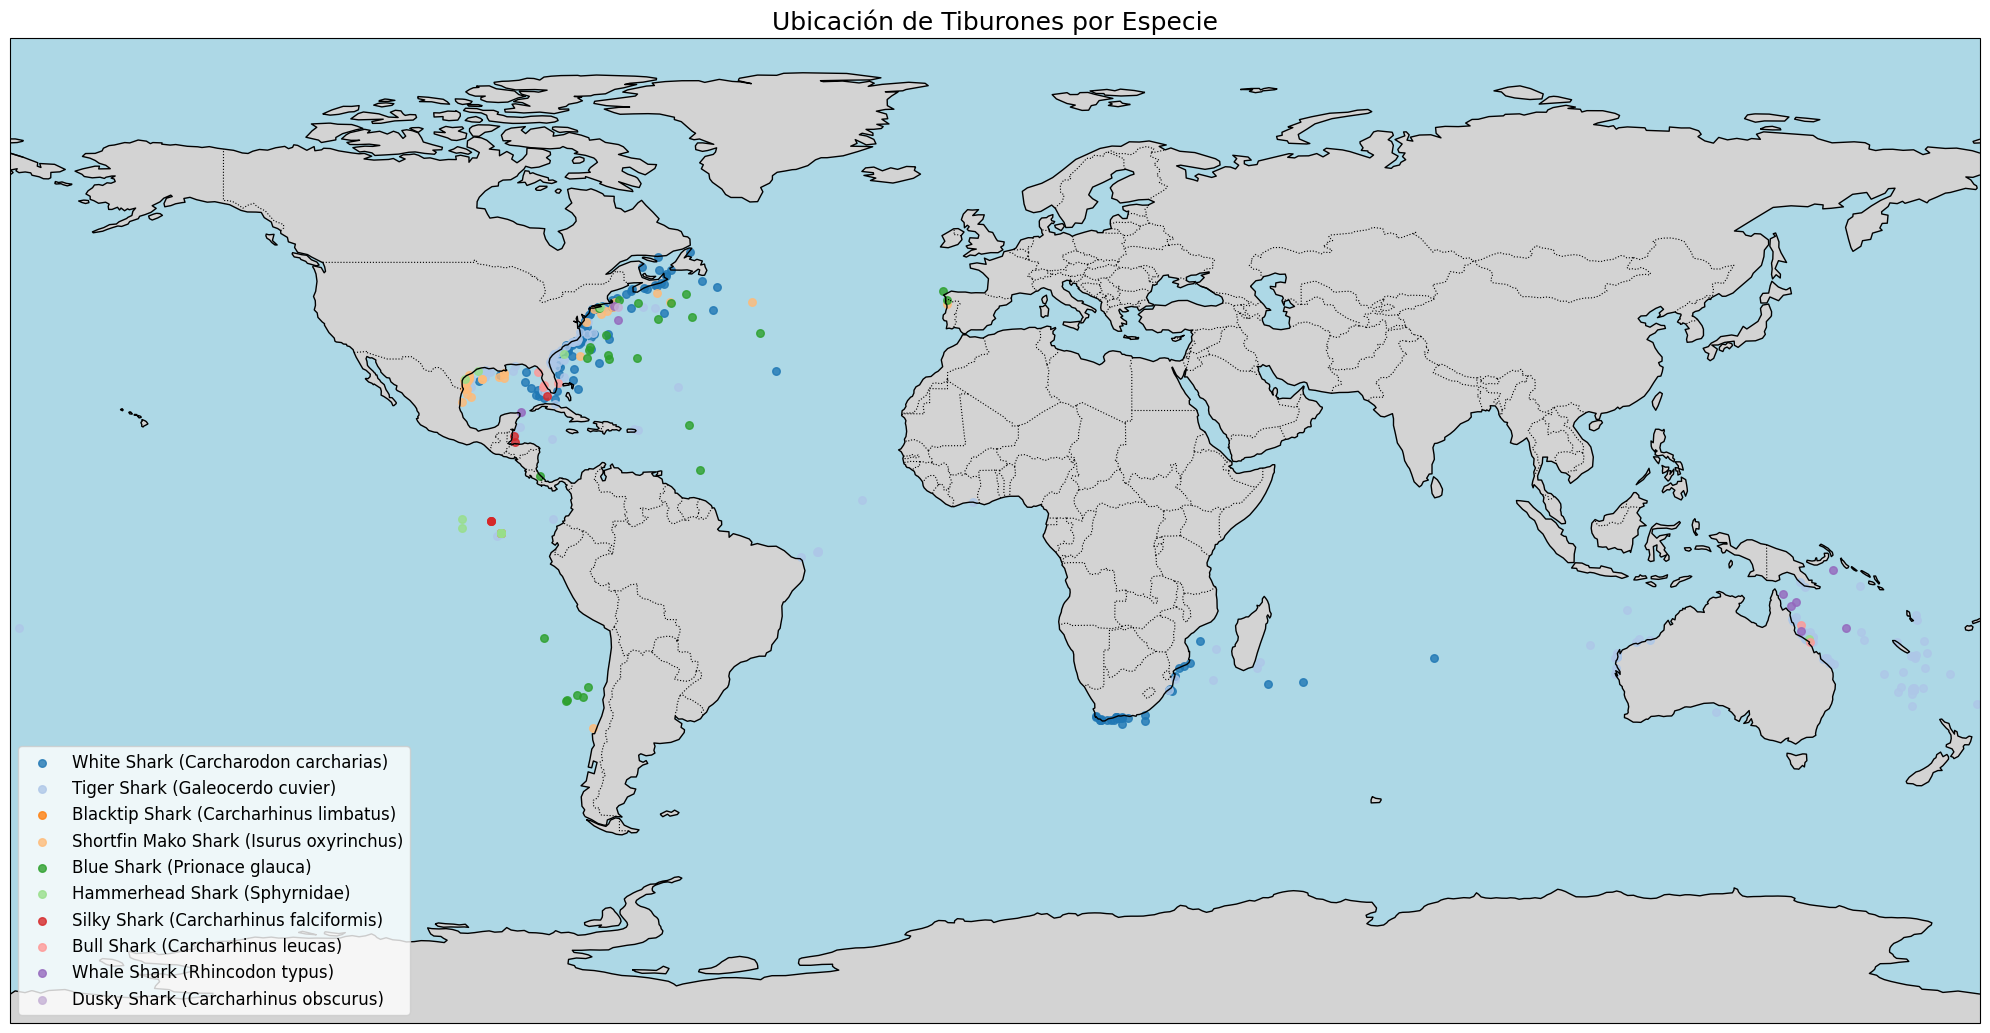

In [ ]:
plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mostrar todo el mundo
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Características geográficas
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)

species_list = sharks['species'].unique()

# Asignar un color a cada especie
colors = plt.cm.tab20.colors  # paleta de 20 colores
color_dict = {species: colors[i % len(colors)] for i, species in enumerate(species_list)}

# Graficar puntos por especie
for species in species_list:
    df = sharks[sharks['species'] == species]
    ax.scatter(df['longitude'], df['latitude'],
               color=color_dict[species], s=30, alpha=0.8,
               transform=ccrs.PlateCarree(),
               label=species)

plt.title("Ubicación de Tiburones por Especie", fontsize=18)
plt.legend(loc='lower left', fontsize=12)
plt.tight_layout()
plt.show()


> **Visualización en [-100, -45, 5, 45]**

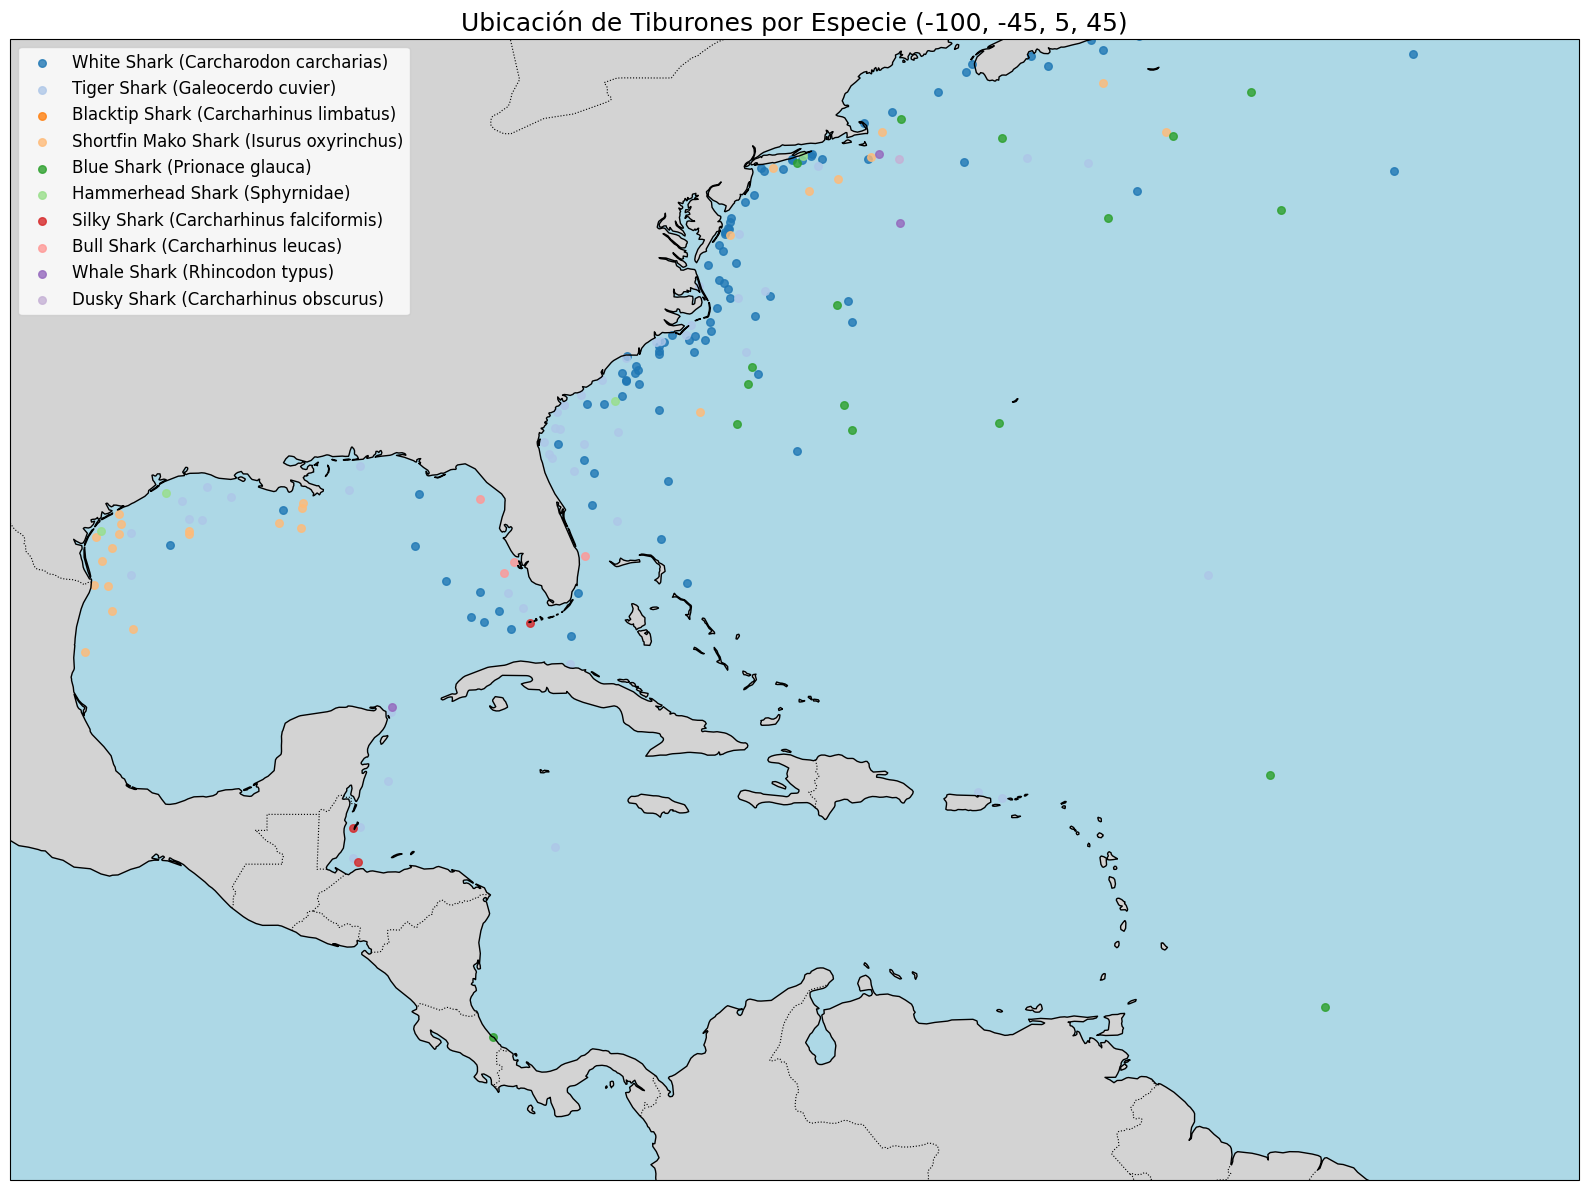

In [ ]:
plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mostrar todo el mundo
ax.set_extent([-100, -45, 5, 45], crs=ccrs.PlateCarree())

# Características geográficas
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)

# Graficar puntos por especie
for species in species_list:
    df = sharks[sharks['species'] == species]
    ax.scatter(df['longitude'], df['latitude'],
               color=color_dict[species], s=30, alpha=0.8,
               transform=ccrs.PlateCarree(),
               label=species)

plt.title("Ubicación de Tiburones por Especie (-100, -45, 5, 45)", fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


> **Filtrado en [-100, -45, 5, 45]**

In [ ]:
sharks = sharks[sharks["latitude"].notnull() & (sharks["latitude"] > 5)]
sharks = sharks[sharks["longitude"].notnull() & (sharks["longitude"] > -100)]
sharks = sharks[sharks["latitude"].notnull() & (sharks["latitude"] < 45)]
sharks = sharks[sharks["longitude"].notnull() & (sharks["longitude"] < -45)]

> **Visualización completa**

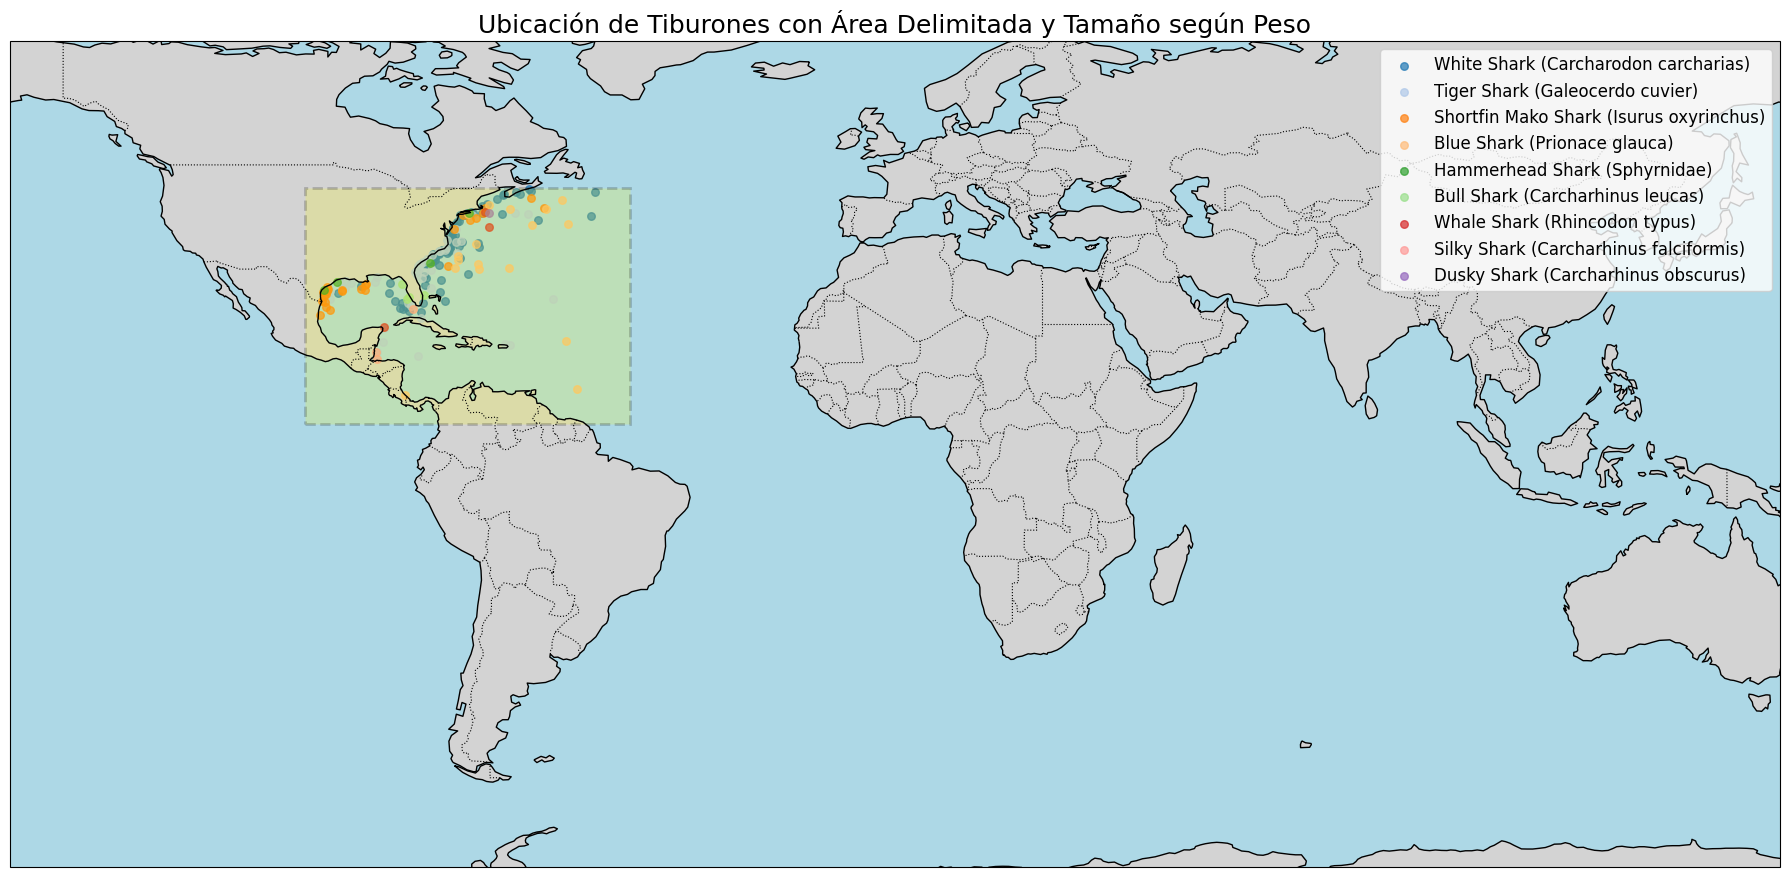

In [ ]:
import matplotlib.patches as patches

# Área delimitada
lon_min, lat_min = -100, 5
lon_max, lat_max = -45, 45
width, height = lon_max - lon_min, lat_max - lat_min

# Crear figura y mapa
plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-150, 150, -70, 70], crs=ccrs.PlateCarree())

# Mapa base
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)

# Graficar puntos solo si existen datos válidos
if not sharks.empty:
    species_list = sharks['species'].unique()
    colors = plt.cm.tab20.colors
    color_dict = {species: colors[i % len(colors)] for i, species in enumerate(species_list)}

    # Asegurarse de que weight sea numérico
    sharks['weight'] = pd.to_numeric(sharks['weight'], errors='coerce')

    for species in species_list:
        df = sharks[sharks['species'] == species]
        if df.empty:
            continue
        ax.scatter(df['longitude'], df['latitude'],
                   color=color_dict[species],
                   s = 30,
                   alpha=0.7,
                   transform=ccrs.PlateCarree(),
                   label=species)

# Dibujar rectángulo delimitado con color semi-transparente
rect = patches.Rectangle(
    (lon_min, lat_min),
    width,
    height,
    linewidth=2,
    edgecolor='black',
    facecolor='yellow',
    alpha=0.2,
    linestyle='--',
    transform=ccrs.PlateCarree()
)
ax.add_patch(rect)

# Título y leyenda
plt.title("Ubicación de Tiburones con Área Delimitada y Tamaño según Peso", fontsize=18)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


> **Fitrar por fecha**

In [ ]:
# Filtrar las filas donde el año sea >= 2023
df_sharks = sharks[sharks["last_move_datetime"].dt.year >= 2023]
df_sharks = df_sharks.drop('weight',axis=1)
df_sharks.describe()

,id,longitude,latitude
count,3.700000e+01,37.000000,37.000000
mean,1.277029e+06,-75.447202,33.938804
std,8.736120e+05,9.844369,6.384164
min,2.883320e+05,-93.960110,21.588789
25%,5.529080e+05,-80.795370,28.806340
50%,8.672100e+05,-76.262510,34.236600
75%,1.561937e+06,-70.489000,37.776390
max,2.832241e+06,-50.815630,44.943260


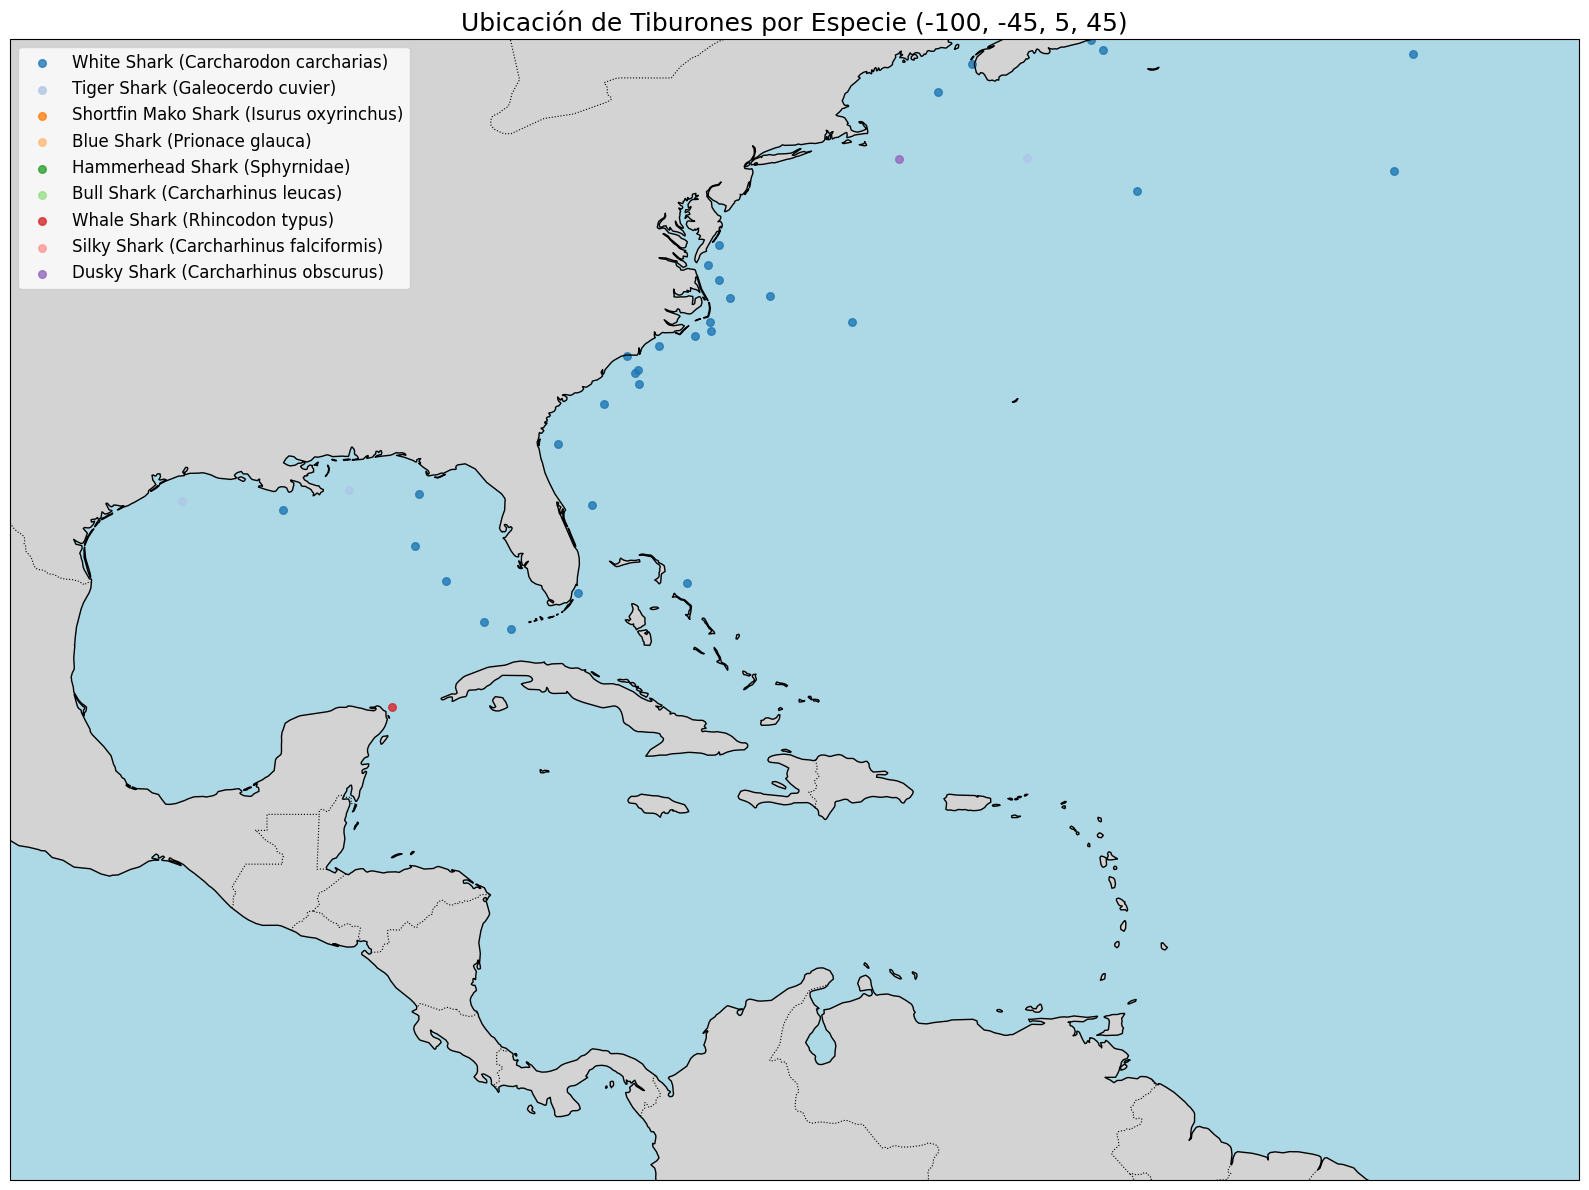

In [ ]:
plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Mostrar todo el mundo
ax.set_extent([-100, -45, 5, 45], crs=ccrs.PlateCarree())

# Características geográficas
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)

# Graficar puntos por especie
for species in species_list:
    df = df_sharks[df_sharks['species'] == species]
    ax.scatter(df['longitude'], df['latitude'],
               color=color_dict[species], s=30, alpha=0.8,
               transform=ccrs.PlateCarree(),
               label=species)

plt.title("Ubicación de Tiburones por Especie (-100, -45, 5, 45)", fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

### **Importación de bases NASA**

- **MODIS**
    - [Chlorophyll concentratioN](https://oceandata.sci.gsfc.nasa.gov/l3/)
    - [Absorption due to phytoplankton at 443 nm](https://oceandata.sci.gsfc.nasa.gov/l3/)

In [ ]:
xrds = xr.open_dataset('AQUA.nc', engine='h5netcdf')
print(xrds)

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    aph_443  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20020704.L3m.DAY.IOP.aph_443...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics 

> **Visualización de Phytoplakton**

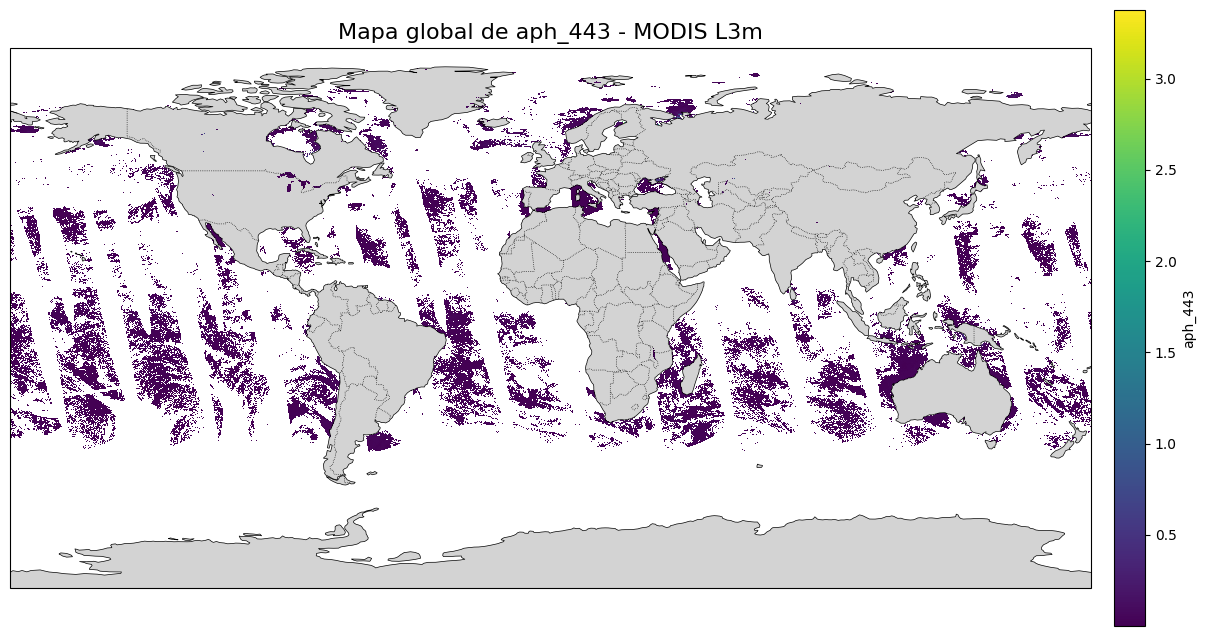

In [ ]:
# Seleccionar variable y primer tiempo (si existiera dimensión temporal)
data = xrds['aph_443']

# Crear figura y eje con proyección PlateCarree
plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Graficar datos
# Ajustamos los valores muy pequeños (<0) a NaN para que no aparezcan en el mapa
data_plot = data.where(data > 0)

img = ax.pcolormesh(xrds['lon'], xrds['lat'], data_plot,
                    transform=ccrs.PlateCarree(),
                    cmap='viridis')

# Añadir mapa base
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)

# Añadir colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical', pad=0.02, fraction=0.05)
cbar.set_label('aph_443')

# Título
plt.title('Mapa global de aph_443 - MODIS L3m', fontsize=16)
plt.show()


> **Visualización de temperatura**

<xarray.Dataset> Size: 4MB
Dimensions:                  (latitude: 720, longitude: 1440, time: 1)
Coordinates:
  * latitude                 (latitude) float64 6kB 89.88 89.62 ... -89.88
  * longitude                (longitude) float64 12kB -179.9 -179.6 ... 179.9
    spatial_ref              int32 4B 4326
  * time                     (time) datetime64[ns] 8B 1988-01-01T21:00:00
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 4MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>


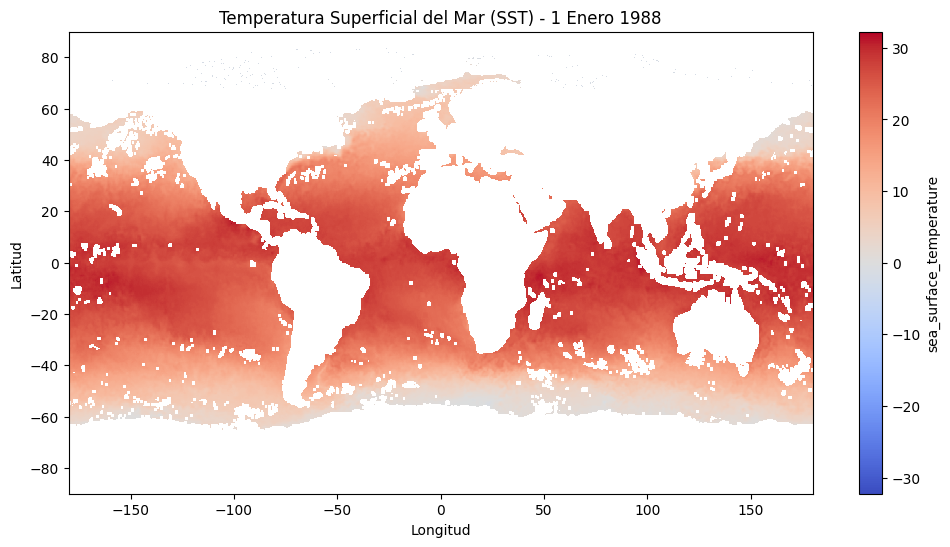

In [ ]:
# Conectar al catálogo de Microsoft Planetary Computer
import odc.stac

client = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# Buscar datos de la colección NOAA CDR SST (1988)
search = client.search(
    collections=["noaa-cdr-sea-surface-temperature-whoi"],
    datetime="1988-01-01T22:00:00Z",
)

# Obtener el primer resultado
item = next(search.items())

# Cargar el dataset usando odc.stac
data = odc.stac.load(
    [item],
    bands=["sea_surface_temperature"],
    resolution=None,   # Usa resolución nativa
    chunks={},          # Opcional: activa Dask para manejar grandes datasets
)

# Mostrar información del dataset cargado
print(data)

# Graficar la temperatura superficial
sst = data["sea_surface_temperature"].isel(time=0)
plt.figure(figsize=(12, 6))
sst.plot(cmap="coolwarm")
plt.title("Temperatura Superficial del Mar (SST) - 1 Enero 1988")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

> **Función de obtención de area en .nc**

In [ ]:
def get_area(lat, lon, xrds=xrds, delta_lat=0.05, delta_lon=0.05, var=''):
    """
    Obtiene el valor promedio de aph_443 en un área rectangular alrededor de la coordenada dada.

    Parámetros:
    -----------
    lat : float
        Latitud central del punto.
    lon : float
        Longitud central del punto.
    xrds : xarray.Dataset
        Dataset abierto con xarray.
    delta_lat : float
        Medio tamaño en grados de latitud alrededor del punto.
    delta_lon : float
        Medio tamaño en grados de longitud alrededor del punto.

    Retorna:
    --------
    float
        Valor promedio de aph_443 en el área seleccionada.
    """
    lat_vals = xrds['lat'].values
    lon_vals = xrds['lon'].values

    # Ajustar longitud a -180 a 180
    lon = ((lon + 180) % 360) - 180

    # Encontrar índices que caen dentro del área
    lat_idx = np.where((lat_vals >= lat - delta_lat) & (lat_vals <= lat + delta_lat))[0]
    lon_idx = np.where((lon_vals >= lon - delta_lon) & (lon_vals <= lon + delta_lon))[0]

    # Extraer submatriz
    sub = xrds[var].isel(lat=lat_idx, lon=lon_idx)

    # Calcular promedio ignorando NaN
    promedio = float(sub.mean(skipna=True).values)

    return promedio

> **Visualización de obrención de valor más cercanoen .nc**

In [ ]:
def get_nearest_valid(lat, lon, xrds=xrds, var='aph_443'):
    """
    Devuelve el valor de aph_443 más cercano con datos válidos al punto dado.
    """
    lat_vals = xrds['lat'].values
    lon_vals = xrds['lon'].values
    data = xrds[var].values

    # Ajustar longitud a -180 a 180
    lon = ((lon + 180) % 360) - 180

    # Crear malla de coordenadas
    lon_grid, lat_grid = np.meshgrid(lon_vals, lat_vals)

    # Calcular distancia al punto
    dist = np.sqrt((lat_grid - lat)**2 + (lon_grid - lon)**2)

    # Poner distancias de NaN a infinito para ignorarlas
    dist[np.isnan(data)] = np.inf

    # Encontrar índice del valor válido más cercano
    idx = np.unravel_index(np.argmin(dist), dist.shape)

    valor = data[idx]
    return float(valor)

# Ejemplo
latitud = 10.0
longitud = -90.0
valor = get_nearest_valid(latitud, longitud)
print(f"Valor de aph_443 más cercano con datos válidos a ({latitud}, {longitud}): {valor}")

Valor de aph_443 más cercano con datos válidos a (10.0, -90.0): 0.015799999237060547


In [ ]:
def get_nearest_valid(lat, lon, xrds, var='aph_443'):
    """
    Devuelve el valor más cercano con datos válidos al punto (lat, lon).
    """
    lat_vals = xrds['lat'].values
    lon_vals = xrds['lon'].values
    data = xrds[var].values

    # Si hay dimensión temporal, tomar la primera
    if data.ndim == 3:
        data = data[0]

    # Ajustar longitud a -180 a 180
    lon = ((lon + 180) % 360) - 180

    # Crear malla de coordenadas
    lon_grid, lat_grid = np.meshgrid(lon_vals, lat_vals)

    # Calcular distancia al punto
    dist = np.sqrt((lat_grid - lat)**2 + (lon_grid - lon)**2)

    # Validar forma
    if data.shape != dist.shape:
        print(f"Formas distintas: data {data.shape}, dist {dist.shape}")
        return np.nan

    # Ignorar valores NaN
    dist[np.isnan(data)] = np.inf

    # Índice del valor más cercano
    idx = np.unravel_index(np.argmin(dist), dist.shape)
    valor = data[idx]

    return float(valor)


# Ejemplo
latitud = 10.0
longitud = -90.0
valor = get_nearest_valid(latitud, longitud, xrds)
print(f"Valor de aph_443 más cercano con datos válidos a ({latitud}, {longitud}): {valor}")

Valor de aph_443 más cercano con datos válidos a (10.0, -90.0): 0.015799999237060547


> **Función de obtención de temperatura en coordenada**

In [ ]:

def get_sst_average(lat, lon, date="2021-02-01T22:00:00Z", area_size=1.0):
    """
    Obtiene la temperatura superficial del mar (SST) puntual y el promedio en un área alrededor de la coordenada dada.

    Parámetros:
    -----------
    lat : float
        Latitud del punto.
    lon : float
        Longitud del punto.
    date : str
        Fecha en formato ISO para consultar el dataset.
    area_size : float
        Tamaño del área en grados (area_size x area_size). Por defecto 1°.

    Retorna:
    --------
    dict
        Diccionario con:
        - 'lat' : latitud utilizada
        - 'lon' : longitud utilizada
        - 'sst_point' : temperatura puntual en °C
        - 'sst_avg' : promedio en área alrededor en °C
        - 'note' : comentario si se ajustó coordenada
    """

    # Conectar al catálogo de Microsoft Planetary Computer
    client = pystac_client.Client.open(
        "https://planetarycomputer.microsoft.com/api/stac/v1",
        modifier=planetary_computer.sign_inplace,
    )

    # Buscar datos de NOAA CDR SST
    search = client.search(
        collections=["noaa-cdr-sea-surface-temperature-whoi"],
        datetime=date,
    )
    item = next(search.items())

    # Cargar dataset
    data = odc.stac.load([item], bands=["sea_surface_temperature"], resolution=None)
    sst = data["sea_surface_temperature"].isel(time=0)

    # Detectar nombres de coordenadas
    lat_name = [c for c in sst.coords if "lat" in c.lower()][0]
    lon_name = [c for c in sst.coords if "lon" in c.lower()][0]

    # Ajustar longitud si dataset usa 0–360
    if sst[lon_name].max() > 180:
        lon = lon % 360

    note = ""
    valor = sst.sel({lat_name: lat, lon_name: lon}, method="nearest").values

    # Si está sobre tierra o sin datos, buscar píxel oceánico más cercano
    if np.isnan(valor):
        sst_masked = sst.where(~np.isnan(sst))
        nearest_idx = np.unravel_index(np.nanargmin(
            np.abs(sst_masked[lat_name] - lat)[:, None] +
            np.abs(sst_masked[lon_name] - lon)[None, :]
        ), sst_masked.shape)
        lat = float(sst_masked[lat_name][nearest_idx[0]].values)
        lon = float(sst_masked[lon_name][nearest_idx[1]].values)
        valor = sst.sel({lat_name: lat, lon_name: lon}).values
        note = f"Coordenada ajustada a píxel oceánico más cercano: ({lat:.2f}, {lon:.2f})"

    # Calcular promedio en área alrededor
    half_size = area_size / 2
    sst_rect = sst.sel(
        {
            lat_name: slice(lat - half_size, lat + half_size),
            lon_name: slice(lon - half_size, lon + half_size)
        }
    )

    return {
        "lat": lat,
        "lon": lon,
        "sst_point": float(valor),
    }

# Ejemplo de uso
result = get_sst_average(10.0, -90.0, area_size=1.0)
print(result)


{'lat': 10.0, 'lon': -90.0, 'sst_point': 24.837921142578125}


> **Complemento a base de datos de tiburones**

In [98]:
from datetime import datetime
import pandas as pd
import numpy as np
import xarray as xr
import os

# --------------------------
# Función para encontrar el archivo más cercano usando enteros
# --------------------------
def get_nearest_file(file_list, target_date):
    """
    file_list: lista de nombres de archivo con fechas en el nombre
    target_date: datetime de referencia
    """
    target_int = int(target_date.strftime("%Y%m%d"))
    min_diff = 99999999
    nearest_file = None

    for f in file_list:
        try:
            dates_str = f.split('.')[1]  # "20020621_20020920"
            start_str, end_str = dates_str.split('_')
            start_int = int(start_str)
            end_int = int(end_str)

            # Si target_date está dentro del rango
            if start_int <= target_int <= end_int:
                return f

            # Sino, medir distancia mínima a los extremos
            diff = min(abs(target_int - start_int), abs(target_int - end_int))
            if diff < min_diff:
                min_diff = diff
                nearest_file = f
        except Exception as e:
            print(f"Error al procesar archivo {f}: {e}")
            continue

    if nearest_file is None:
        raise ValueError(f"No se encontró archivo cercano para la fecha {target_date}")

    return nearest_file

# --------------------------
# Lista de archivos disponibles de CHL
# --------------------------
modis_files_chl = sorted([f for f in os.listdir('modis_CHL') if 'CHL' in f])

# --------------------------
# Abrir dataset IOP fijo
# --------------------------
xrds_IOP = xr.open_dataset("AQUA_IOP.nc", engine='h5netcdf')

# --------------------------
# Inicializar columnas
# --------------------------
sharks['CHL'] = np.nan
sharks['IOP'] = np.nan
sharks['Temp'] = np.nan

# --------------------------
# Ciclo principal
# --------------------------
for idx, row in sharks.iterrows():
    shark_id = row['id']
    lat = row['latitude']
    lon = row['longitude']
    date = row['last_move_datetime']

    # Convertir fecha a datetime si no lo es
    if not isinstance(date, datetime):
        date = pd.to_datetime(date, utc=True)

    # --------------------------
    # Buscar el archivo CHL más cercano
    # --------------------------
    try:
        nearest_chl_file = get_nearest_file(modis_files_chl, date)

        # Abrir dataset CHL correspondiente
        with xr.open_dataset(os.path.join('modis_CHL', nearest_chl_file), engine='h5netcdf') as xrds_CHL:

            # Llamar funciones de obtención de datos
            aph_443 = get_nearest_valid(lat, lon, xrds_IOP, var="aph_443")
            chlor_a = get_nearest_valid(lat, lon, xrds_CHL, var="chlor_a")
            temp = get_sst_average(lat=lat, lon=lon, date=date.strftime("%Y-%m-%dT%H:%M:%SZ"))

            # Guardar resultados en el DataFrame
            sharks.at[idx, 'CHL'] = chlor_a
            sharks.at[idx, 'IOP'] = aph_443
            sharks.at[idx, 'Temp'] = temp['sst_point']

            print(f"Tiburón {shark_id}: lat={lat}, lon={lon}, fecha={date}, aph_443={aph_443}, CHL={chlor_a}, SST={temp['sst_point']}")

    except Exception as e:
        print(f"Error en tiburón {shark_id}: {e}")


Error en tiburón 288211: too many indices
Error en tiburón 288212: too many indices
Error en tiburón 288213: too many indices
Error en tiburón 288217: Unable to synchronously open file (truncated file: eof = 33554432, sblock->base_addr = 0, stored_eof = 58936450)
Error en tiburón 288218: too many indices
Error en tiburón 288219: too many indices
Tiburón 288224: lat=28.08555, lon=-78.70771, fecha=2018-11-21 22:57:24+00:00, aph_443=0.006700038909912109, CHL=0.06305364519357681, SST=27.374486923217773
Tiburón 288228: lat=35.90723, lon=-74.47037, fecha=2014-09-25 11:01:45+00:00, aph_443=0.032000064849853516, CHL=0.6071965098381042, SST=27.214120864868164
Error en tiburón 288230: Unable to synchronously open file (truncated file: eof = 33554432, sblock->base_addr = 0, stored_eof = 58936450)
Error en tiburón 288231: too many indices
Tiburón 288233: lat=31.28815, lon=-70.47552, fecha=2016-12-27 11:01:16+00:00, aph_443=0.006200075149536133, CHL=0.14734061062335968, SST=21.821374893188477
Tibur

In [117]:
sharks.describe()

,id,weight,longitude,latitude,CHL,IOP,Temp,cluster
count,1.930000e+02,1.0,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,5.298335e+05,464.5,-77.549880,32.667581,0.453536,0.022133,23.807107,1.326425
std,5.434850e+05,NaN,9.899014,6.991278,0.692293,0.015451,2.402974,1.385256
min,2.882110e+05,464.5,-97.372990,10.005920,0.030489,0.004100,15.815417,0.000000
25%,2.883340e+05,464.5,-82.421690,28.009500,0.204156,0.016137,22.711095,0.000000
50%,2.884540e+05,464.5,-76.927300,33.026500,0.219791,0.016570,23.630475,1.000000
75%,5.529080e+05,464.5,-72.397700,38.368880,0.362242,0.022000,25.242662,3.000000
max,2.832241e+06,464.5,-50.815630,44.943260,7.283734,0.098300,30.692507,3.000000


> **Completar datos faltantes**

In [100]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# ----------------------------
# Convertir fecha a timestamp
# ----------------------------
sharks['timestamp'] = sharks['last_move_datetime'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

# ----------------------------
# Seleccionar variables para KNN
# ----------------------------
# Usamos lat, lon, timestamp como features para imputar CHL, IOP, Temp
features_for_knn = ['latitude', 'longitude', 'timestamp', 'CHL', 'IOP', 'Temp']
data_knn = sharks[features_for_knn]

# ----------------------------
# Imputación KNN
# ----------------------------
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_array = imputer.fit_transform(data_knn)

# ----------------------------
# Reemplazar valores imputados en el DataFrame
# ----------------------------
sharks[features_for_knn] = imputed_array

# ----------------------------
# Opcional: eliminar columna timestamp si no la necesitas
# ----------------------------
sharks.drop(columns=['timestamp'], inplace=True)

# ----------------------------
# Revisar resultados
# ----------------------------
print(sharks[['id', 'CHL', 'IOP', 'Temp']].head(10))

        id       CHL       IOP       Temp
0   288211  0.142647  0.012320  26.320557
1   288212  1.469680  0.034201  22.340241
2   288213  1.296850  0.060990  18.785488
6   288217  0.486853  0.025592  25.600630
7   288218  0.911161  0.048516  21.576381
8   288219  1.717424  0.035969  22.441225
13  288224  0.063054  0.006700  27.374487
16  288228  0.607197  0.032000  27.214121
18  288230  0.469570  0.025006  25.787254
19  288231  0.136929  0.008337  23.751628


In [101]:
sharks.describe()

,id,weight,longitude,latitude,CHL,IOP,Temp
count,1.930000e+02,1.0,193.000000,193.000000,193.000000,193.000000,193.000000
mean,5.298335e+05,464.5,-77.549880,32.667581,0.453536,0.022133,23.807107
std,5.434850e+05,NaN,9.899014,6.991278,0.692293,0.015451,2.402974
min,2.882110e+05,464.5,-97.372990,10.005920,0.030489,0.004100,15.815417
25%,2.883340e+05,464.5,-82.421690,28.009500,0.204156,0.016137,22.711095
50%,2.884540e+05,464.5,-76.927300,33.026500,0.219791,0.016570,23.630475
75%,5.529080e+05,464.5,-72.397700,38.368880,0.362242,0.022000,25.242662
max,2.832241e+06,464.5,-50.815630,44.943260,7.283734,0.098300,30.692507


In [107]:
sharks = sharks.drop('weight',axis=1)
sharks.head(5)

,id,last_update,length,last_move_datetime,stage_of_life,species,gender,longitude,latitude,CHL,IOP,Temp
0,288211,2025-08-29T20:33:29.142129Z,12 ft 5 in.,2018-12-30 10:28:52+00:00,Sub-Adult,White Shark (Carcharodon carcharias),Female,-79.78037,32.209960,0.142647,0.012320,26.320557
1,288212,2025-08-29T20:40:20.395973Z,9 ft 2 in.,2014-06-01 11:51:10+00:00,Sub-Adult,Tiger Shark (Galeocerdo cuvier),Male,-80.83400,31.934852,1.469680,0.034201,22.340241
2,288213,2025-08-29T20:32:14.512120Z,5 ft 5 in.,2017-10-11 20:25:02+00:00,Young of the Year,White Shark (Carcharodon carcharias),Male,-72.58917,40.790990,1.296850,0.060990,18.785488
6,288217,2025-08-29T20:40:47.839143Z,6 ft 4 in.,2020-04-11 01:51:37+00:00,Sub-Adult,Shortfin Mako Shark (Isurus oxyrinchus),Male,-96.55284,25.827470,0.486853,0.025592,25.600630
7,288218,2025-08-29T20:38:54.094076Z,4 ft 5 in.,2017-09-11 08:52:56+00:00,Juvenile,Tiger Shark (Galeocerdo cuvier),Female,-93.09572,29.275290,0.911161,0.048516,21.576381


> **Guardar**

In [105]:
sharks.to_csv('sharks_nasa.csv', index=False)

> **Complemento de tiburones de >2022 con datos del mar**

In [ ]:
# Configuración base
arr=[]
df = df_sharks

for _, row in df.iterrows():
    # Obtener fecha de movimiento y coordenadas
    date_str = row["last_move_datetime"]
    lon = row["longitude"]
    lat = row["latitude"]
    id = row["id"]

    # Ignorar registros sin coordenadas o fechas válidas
    if pd.isna(date_str) or pd.isna(lon) or pd.isna(lat):
        continue

    try:
        date = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")

    except:
        continue

    # Rango de fechas ±3 días (puedes ajustar)
    start_date = date.strftime("%Y-%m-%dT01:00:00Z")
    end_date   = date.strftime("%Y-%m-%dT23:00:00Z")

    if(date.year>2022):
          bbox = f"{lon_min},{lat_min},{lon_max},{lat_max}"
          arr.append(f'podaac-data-subscriber -c SWOT_L2_LR_SSH_2.0 -d ./data_{id} --start-date {start_date} --end-date {end_date}')

    #print(start_date," ",end_date)

    # Definir bounding box ±1 grado
print(arr)

[]


### **Model**

> **Preparación de datos**

In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# Columnas a usar
features_cols = ['CHL', 'IOP', 'Temp', 'latitude', 'longitude']

# Imputar valores faltantes con KNN
imputer = KNNImputer(n_neighbors=5)
sharks[features_cols] = imputer.fit_transform(sharks[features_cols])

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sharks[features_cols])


> **Modelo no supervisado**

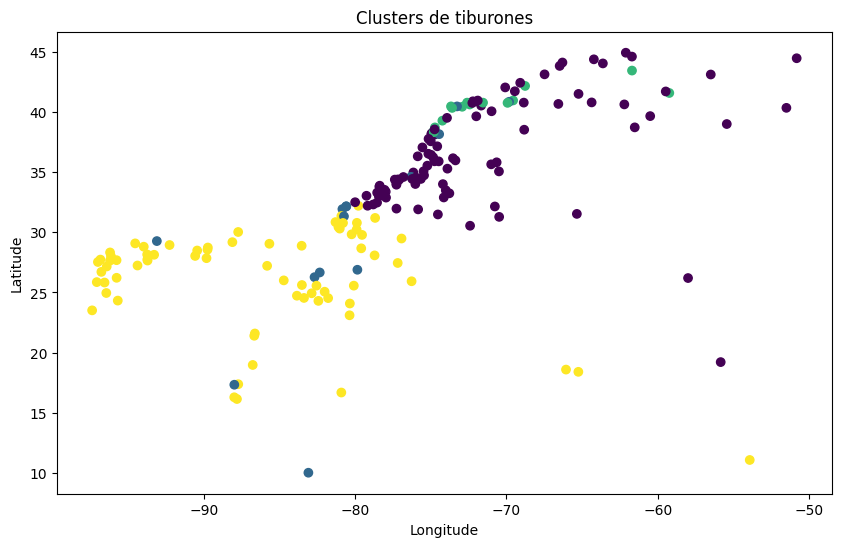

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Número de clusters (ajustar con método del codo si se desea)
kmeans = KMeans(n_clusters=4, random_state=42)
sharks['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización geográfica
plt.figure(figsize=(10,6))
plt.scatter(sharks['longitude'], sharks['latitude'], c=sharks['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de tiburones')
plt.show()



> **Modelo probabilístico**

In [120]:
from scipy.stats import multivariate_normal

# Ajustar distribución multivariante sobre los datos escalados
mean_vec = X_scaled.mean(axis=0)
cov_mat = np.cov(X_scaled, rowvar=False)
mvnorm = multivariate_normal(mean=mean_vec, cov=cov_mat)

# Evaluar probabilidad de un punto específico
point = np.array([[0.15, 0.012, 26.3, 32.0, -79.0]])  # CHL, IOP, Temp, lat, lon
point_scaled = scaler.transform(point)
prob = mvnorm.pdf(point_scaled)
print(f"Probabilidad de presencia en el punto: {prob}")


Probabilidad de presencia en el punto: 0.015355600687843208


> **Probabilidad en grid**

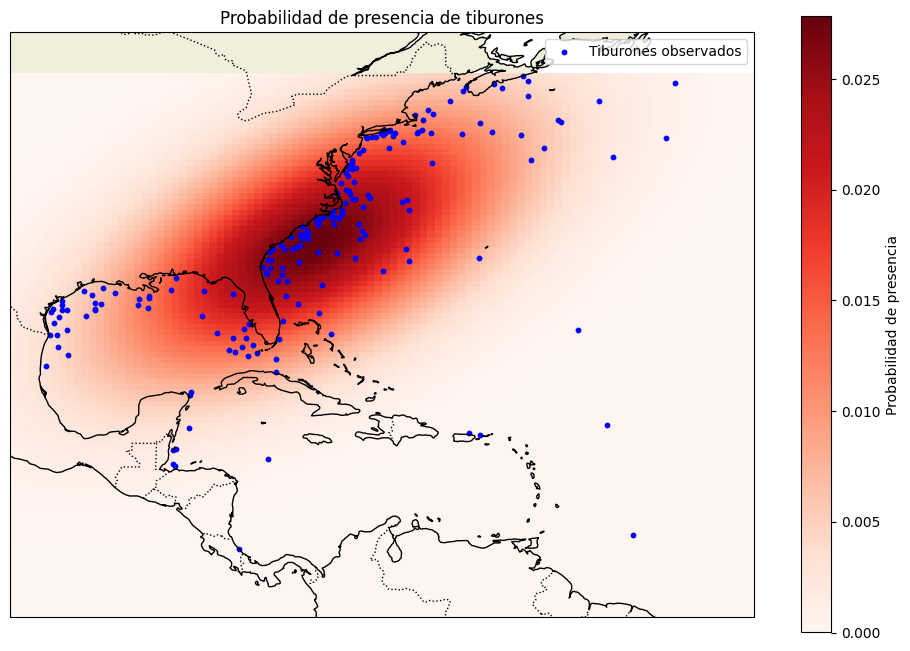

In [121]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Área de interés
lat_min, lat_max = 5, 45
lon_min, lon_max = -100, -45

# Grilla
n_lat, n_lon = 100, 100
lat_grid = np.linspace(lat_min, lat_max, n_lat)
lon_grid = np.linspace(lon_min, lon_max, n_lon)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# Variables ambientales promedio o interpoladas
CHL_grid = np.full_like(lat2d, sharks['CHL'].mean())
IOP_grid = np.full_like(lat2d, sharks['IOP'].mean())
TEMP_grid = np.full_like(lat2d, sharks['Temp'].mean())

# Preparar matriz para probabilidad
grid_features = np.stack([CHL_grid.ravel(), IOP_grid.ravel(), TEMP_grid.ravel(), lat2d.ravel(), lon2d.ravel()], axis=1)
grid_scaled = scaler.transform(grid_features)
probs_grid = mvnorm.pdf(grid_scaled).reshape(lat2d.shape)

# Visualización
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

im = ax.pcolormesh(lon2d, lat2d, probs_grid, cmap='Reds', shading='auto')
plt.colorbar(im, label='Probabilidad de presencia')
ax.scatter(sharks['longitude'], sharks['latitude'], c='blue', s=10, label='Tiburones observados')
plt.legend()
plt.title('Probabilidad de presencia de tiburones')
plt.show()


### **Prueba**

In [134]:
# Fecha de interés
target_date = pd.to_datetime("2016-04-27")

# Área de interés
lat_min, lat_max = 5, 45
lon_min, lon_max = -100, -45

# Resolución de grilla
n_lat, n_lon = 100, 100
lat_grid = np.linspace(lat_min, lat_max, n_lat)
lon_grid = np.linspace(lon_min, lon_max, n_lon)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

> **Datos**

In [135]:
# Listar archivos disponibles
modis_chl_files = sorted([f for f in os.listdir('modis_CHL') if 'CHL' in f])
nearest_chl_file = get_nearest_file(modis_chl_files, target_date)
xrds_CHL = xr.open_dataset(os.path.join('modis_CHL', nearest_chl_file), engine='h5netcdf')

# IOP es fijo
xrds_IOP = xr.open_dataset("AQUA_IOP.nc", engine='h5netcdf')


> **Interpolación**

In [137]:
# -------------------------------
# Interpolación CHL e IOP
# -------------------------------
CHL_grid = xrds_CHL['chlor_a'].interp(
    lat=(("y","x"), lat2d),
    lon=(("y","x"), lon2d),
    method="nearest"
).values

IOP_grid = xrds_IOP['aph_443'].interp(
    lat=(("y","x"), lat2d),
    lon=(("y","x"), lon2d),
    method="nearest"
).values

# -------------------------------
# Interpolación TEMP (SST) usando solo esquinas y centro
# -------------------------------
TEMP_grid = np.empty_like(CHL_grid)
TEMP_grid[:] = np.nan  # inicializamos con NaN

# Puntos: esquinas + centro
points_idx = [
    (0, 0),  # top-left
    (0, n_lon-1),  # top-right
    (n_lat-1, 0),  # bottom-left
    (n_lat-1, n_lon-1),  # bottom-right
    (n_lat//2, n_lon//2)  # centro
]

for i,j in points_idx:
    lat_pt = lat2d[i,j]
    lon_pt = lon2d[i,j]
    try:
        val = get_sst_average(lat_pt, lon_pt, target_date.strftime("%Y-%m-%dT%H:%M:%SZ"))['sst_point']
        TEMP_grid[i,j] = val
    except (KeyError, IndexError, TypeError):
        TEMP_grid[i,j] = np.nan  # si no hay valor, dejamos NaN

# -------------------------------
# Rellenar la grilla con promedio de valores válidos
# -------------------------------
valid_vals = TEMP_grid[~np.isnan(TEMP_grid)]
mean_val = np.nan
if len(valid_vals) > 0:
    mean_val = valid_vals.mean()

# Asignar el promedio a toda la grilla
TEMP_grid[:] = mean_val
print(f"Valor promedio de SST usado para toda la grilla: {mean_val}")


Valor promedio de SST usado para toda la grilla: 22.586488723754883


> **Preparación de datos para clustering y probabilidad**

In [138]:
# Suponemos que sharks DataFrame tiene columnas: CHL, IOP, Temp, latitude, longitude
features = sharks[['CHL','IOP','Temp','latitude','longitude']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Clustering KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
sharks['cluster'] = kmeans.fit_predict(X_scaled)

# Distribución multivariante
mean_vec = X_scaled.mean(axis=0)
cov_mat = np.cov(X_scaled, rowvar=False)
mvnorm = multivariate_normal(mean=mean_vec, cov=cov_mat)


> **Calcular probabilidad sobre grilla**

In [139]:
grid_features = np.stack([CHL_grid.ravel(), IOP_grid.ravel(), TEMP_grid.ravel(), lat2d.ravel(), lon2d.ravel()], axis=1)
grid_scaled = scaler.transform(grid_features)
probs_grid = mvnorm.pdf(grid_scaled).reshape(lat2d.shape)


> **Visualización con Cartopy**

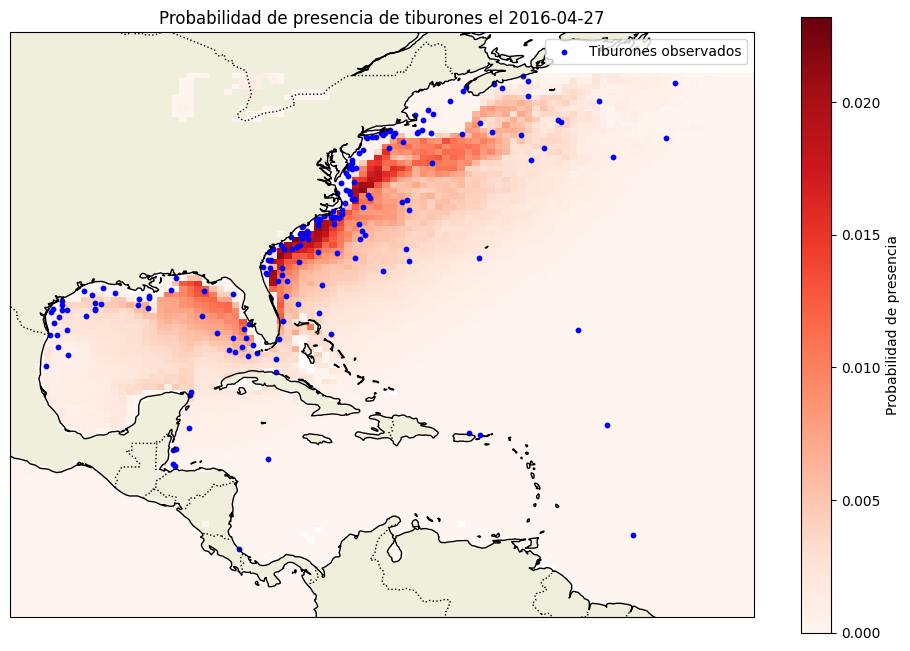

In [140]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

im = ax.pcolormesh(lon2d, lat2d, probs_grid, cmap='Reds', shading='auto')
plt.colorbar(im, label='Probabilidad de presencia')
ax.scatter(sharks['longitude'], sharks['latitude'], c='blue', s=10, label='Tiburones observados')
plt.legend()
plt.title(f'Probabilidad de presencia de tiburones el {target_date.date()}')
plt.show()


### **Simulation**

Para estimar la probabilidad de presencia de tiburones en un área determinada, se implementó un enfoque combinado de simulación Monte Carlo y estimación de densidad de núcleo (KDE). Primero, se definió una grilla sobre la región de interés y se generaron puntos de Monte Carlo únicamente sobre áreas de agua, evitando las zonas terrestres mediante una máscara geográfica basada en datos de costa. A cada punto se le asignaron valores promedio de variables ambientales relevantes (clorofila, IOP y temperatura). Paralelamente, se tomaron los registros de tiburones observados como datos positivos reales. Los conjuntos de puntos Monte Carlo y los tiburones observados se combinaron y escalaron para realizar un KDE multivariado, lo que permitió calcular la densidad de probabilidad sobre toda la grilla. Finalmente, se normalizó la densidad y se aplicó la máscara de agua, de modo que las regiones terrestres quedaran excluidas, generando un mapa de probabilidad suavizado y realista que refleja tanto la densidad de tiburones reales como las áreas potencialmente accesibles para ellos.

> **Simulación con monte carlo y KDE**

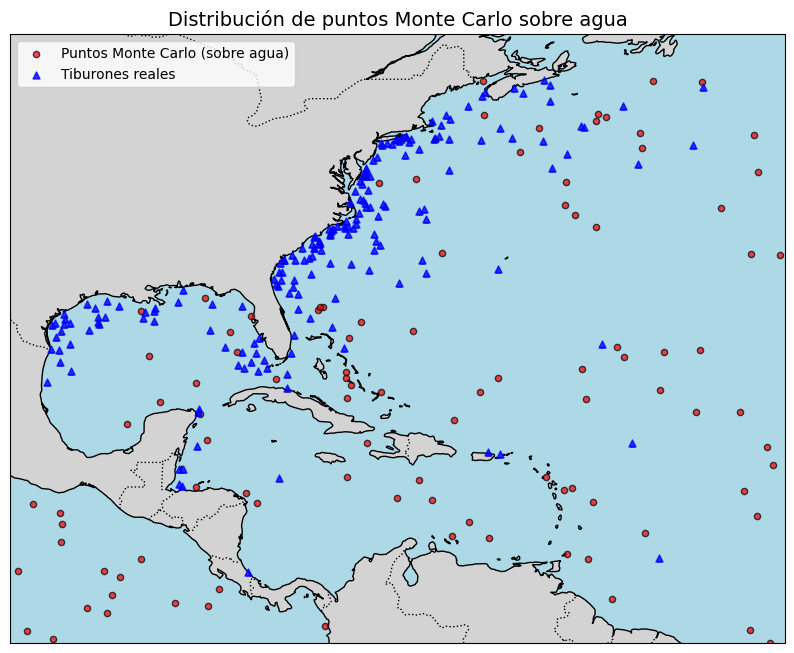

In [206]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KernelDensity
from shapely.geometry import Point
from shapely.prepared import prep
import shapely.ops
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# -------------------------------
# 0. Máscara de agua
# -------------------------------
land_geom = cfeature.NaturalEarthFeature('physical', 'land', '10m')
land_shapes = [shape for shape in land_geom.geometries()]
land_union = prep(shapely.ops.unary_union(land_shapes))

def is_water(lat, lon):
    return not land_union.contains(Point(lon, lat))

# -------------------------------
# 1. Generar puntos Monte Carlo sobre agua
# -------------------------------
n_mc = 100
mc_points = []
while len(mc_points) < n_mc:
    lat = np.random.uniform(5, 45)
    lon = np.random.uniform(-100, -45)
    if is_water(lat, lon):
        mc_points.append([lat, lon])
mc_points = np.array(mc_points)

# -------------------------------
# Visualización de puntos Monte Carlo sobre el mapa
# -------------------------------
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -45, 5, 45])  # Extensión geográfica

# Agregar características del mapa
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, zorder=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=1)

# Graficar los puntos Monte Carlo
ax.scatter(
    mc_points[:,1],  # Longitud
    mc_points[:,0],  # Latitud
    c='red', s=20, edgecolor='k', alpha=0.7,
    transform=ccrs.PlateCarree(),
    label='Puntos Monte Carlo (sobre agua)'
)

# Graficar los puntos reales de tiburones, si se desea comparar
if 'sharks' in locals():
    ax.scatter(
        sharks['longitude'], sharks['latitude'],
        c='blue', s=25, alpha=0.8, marker='^',
        transform=ccrs.PlateCarree(),
        label='Tiburones reales'
    )

# Configurar leyenda y título
plt.legend(loc='upper left')
plt.title('Distribución de puntos Monte Carlo sobre agua', fontsize=14)
plt.show()

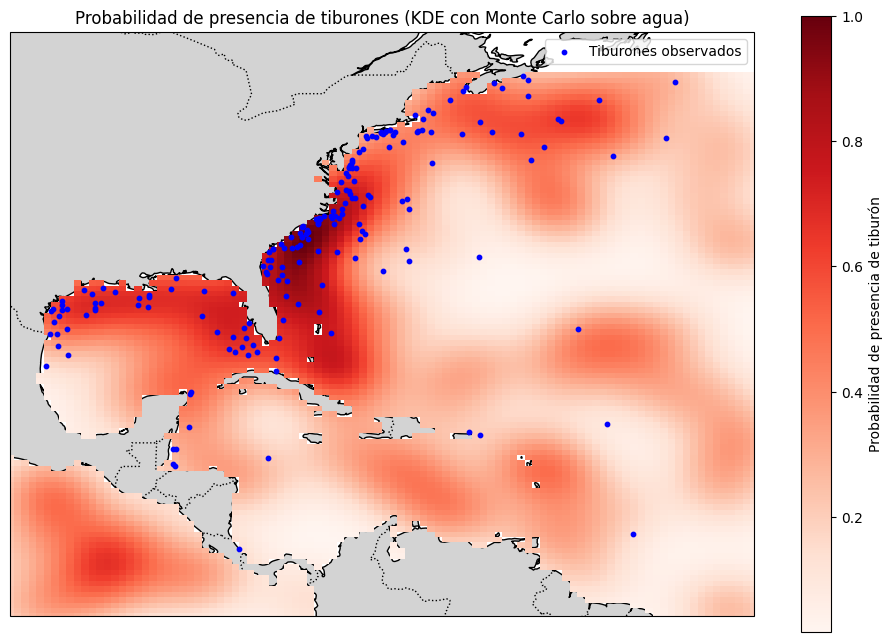

In [207]:
# -------------------------------
# 2. Variables ambientales promedio
# -------------------------------
chl_mean = sharks['CHL'].mean()
iop_mean = sharks['IOP'].mean()
temp_mean = sharks['Temp'].mean()

X_mc = np.column_stack([
    mc_points[:,0],
    mc_points[:,1],
    np.full(mc_points.shape[0], chl_mean),
    np.full(mc_points.shape[0], iop_mean),
    np.full(mc_points.shape[0], temp_mean)
])

# -------------------------------
# 3. Datos de tiburones reales
# -------------------------------
X_sharks = sharks[['latitude','longitude','CHL','IOP','Temp']].values

# -------------------------------
# 4. Combinar MC + tiburones para KDE
# -------------------------------
X_all = np.vstack([X_sharks, X_mc])

scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)

X_sharks_scaled = X_all_scaled[:len(X_sharks)]
X_mc_scaled = X_all_scaled[len(X_sharks):]

# -------------------------------
# 5. KDE multivariado
# -------------------------------
bandwidth = 0.05
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X_all_scaled)

# -------------------------------
# 6. Evaluar probabilidad sobre grilla
# -------------------------------
n_lat, n_lon = 100, 100
lat_grid = np.linspace(5, 45, n_lat)
lon_grid = np.linspace(-100, -45, n_lon)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

grid_points = np.column_stack([
    lat2d.ravel(),
    lon2d.ravel(),
    np.full(lat2d.size, chl_mean),
    np.full(lat2d.size, iop_mean),
    np.full(lat2d.size, temp_mean)
])
grid_scaled = scaler.transform(grid_points)

log_density_grid = kde.score_samples(grid_scaled)
prob_grid = np.exp(log_density_grid)
prob_grid = (prob_grid - prob_grid.min()) / (prob_grid.max() - prob_grid.min())
prob_grid = prob_grid.reshape(lat2d.shape)

# -------------------------------
# 7. Aplicar máscara de agua
# -------------------------------
mask_water = np.vectorize(is_water)(lat2d, lon2d)
prob_grid_masked = np.where(mask_water, prob_grid, np.nan)

# -------------------------------
# 8. Graficar
# -------------------------------
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -45, 5, 45])
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, zorder=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=1)

im = ax.pcolormesh(lon2d, lat2d, prob_grid_masked, cmap='Reds', shading='auto')
plt.colorbar(im, label='Probabilidad de presencia de tiburón')

ax.scatter(sharks['longitude'], sharks['latitude'], c='blue', s=10, label='Tiburones observados')
plt.legend()
plt.title('Probabilidad de presencia de tiburones (KDE con Monte Carlo sobre agua)')
plt.show()
